In [1]:
# Importing Packages

import numpy as np
import matplotlib.pyplot as plt
import time

from typing import Optional, Union

import jax
import jax.numpy as jnp
from jax.scipy.special import erf
from jax import jit, vmap, block_until_ready, config

from rl_algos.ppo_fft_cnn import PPO_make_train

In [2]:
# Seeding everything

seed = 30

rng = jax.random.PRNGKey(seed)
rng, _rng = jax.random.split(rng)

In [27]:
# Defining Cairo Params and RL Params

tau_0 = 0.398
kappa = 20.0
chi = 0.65 * 2. * jnp.pi
kerr = 0.002
gamma = 1/140
time_coeff = 10.0
snr_coeff = 10.0
smoothness_coeff = 0.01
smoothness_baseline_scale = 1.0
apply_smoothing = False
bandwidth = 50.0
freq_relative_cutoff = 0.05
bandwidth_coeff = 25.0
apply_bandwidth_constraint = True
n0 = 43
res_amp_scaling = 1/0.43
actual_max_photons = n0 * (1 - jnp.exp(-0.5 * kappa * tau_0))**2
print(f"Rough Max Photons: {n0}")
print(f"Actual Max Photons: {actual_max_photons}")
nR = 0.01
snr_scale_factor = 1.9
gamma_I = 1/140
num_t1 = 5.0
photon_gamma = 1/1500
init_fid = 1 - 1e-4
photon_weight = 4.0

env_config = {"kappa": kappa,
    "chi": chi,
    "kerr": kerr,
    "time_coeff": time_coeff,
    "snr_coeff": snr_coeff,
    "smoothness_coeff": smoothness_coeff,
    "smoothness_baseline_scale": smoothness_baseline_scale,
    "apply_smoothing": apply_smoothing,
    "bandwidth": bandwidth,
    "freq_relative_cutoff": freq_relative_cutoff,
    "bandwidth_coeff": bandwidth_coeff,
    "apply_bandwidth_constraint": apply_bandwidth_constraint,
    "n0": n0,
    "tau_0": tau_0,
    "res_amp_scaling": res_amp_scaling,
    "nR": nR,
    "snr_scale_factor": snr_scale_factor,
    "gamma_I": gamma_I,
    "photon_gamma": photon_gamma,
    "num_t1": num_t1,
    "init_fid": init_fid,
    "photon_weight": photon_weight
}

num_envs = 256
num_updates = 8000
config = {
    "LR": 3e-4,
    "NUM_ENVS": num_envs,
    "NUM_STEPS": 1,
    "NUM_UPDATES": num_updates,
    "UPDATE_EPOCHS": 4,
    "NUM_MINIBATCHES": int(num_envs / 64),
    "CLIP_EPS": 0.2,
    "VALUE_CLIP_EPS": 0.2,
    "ENT_COEF": 0.0,
    "VF_COEF": 0.5,
    "MAX_GRAD_NORM": 0.5,
    "ACTIVATION": "tanh",
    "LAYER_SIZE": 64,
    # "KERNEL_SIZE": 15,
    "ENV_NAME": "single_langevin_env",
    "ENV_PARAMS": env_config,
    "ANNEAL_LR": False,
    "DEBUG": True,
    "DEBUG_ACTION": False,
    "PRINT_RATE": 100,
    "ACTION_PRINT_RATE": 100,
}

Rough Max Photons: 43
Actual Max Photons: 41.40804860100575


In [28]:
single_train = jit(PPO_make_train(config), static_argnums=-1)

print(f"Starting a Run of {num_updates} Updates")
start = time.time()
single_result = single_train(
    _rng, 
    num_envs)
end = time.time()
print(f"time taken: {end - start}")

Starting a Run of 8000 Updates
global update: 100
reward: -10219.37066569227
max pF: 0.5178220295784262
max photon: 1.3746633066330105
photon time: 0.13082013552583635
smoothness: 0.23045671112461966
bandwidth: 237.9700413223141
global update: 200
reward: -7961.867140279937
max pF: 0.5647709537543242
max photon: 1.8198023951845244
photon time: 0.16937284495068572
smoothness: 0.2025214581313378
bandwidth: 237.9545454545455
global update: 300
reward: -5620.383079414682
max pF: 0.6952277513674773
max photon: 2.8060602680779994
photon time: 0.30743951164955197
smoothness: 0.16920079424157128
bandwidth: 237.8460743801653
global update: 400
reward: -3950.0436257707524
max pF: 1.0264874392098275
max photon: 5.326639249455184
photon time: 0.40085860289309566
smoothness: 0.14003415881329828
bandwidth: 237.67561983471074
global update: 500
reward: -2455.7220388508968
max pF: 1.2005244373387403
max photon: 7.949393092654645
photon time: 0.4827155501438226
smoothness: 0.10703652195071495
bandwidth

XlaRuntimeError: INTERNAL: Generated function failed: CpuCallback error: KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/interpreters/mlir.py(2366): _wrapped_callback
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/interpreters/pxla.py(1151): __call__
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/profiler.py(336): wrapper
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(1185): _pjit_call_impl_python
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(1229): call_impl_cache_miss
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(1245): _pjit_call_impl
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/core.py(935): process_primitive
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/core.py(447): bind_with_trace
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/core.py(2740): bind
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(168): _python_pjit_helper
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(257): cache_miss
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/traceback_util.py(179): reraise_with_filtered_traceback
  /var/folders/g4/_yhz0jm50s17zz2ms7wwytcr0000gr/T/ipykernel_1125/543495048.py(5): <module>
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3550): run_code
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3490): run_ast_nodes
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3308): run_cell_async
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3103): _run_cell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3048): run_cell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/zmqshell.py(549): run_cell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/ipkernel.py(429): do_execute
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(766): execute_request
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(424): dispatch_shell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(518): process_one
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(529): dispatch_queue
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py(80): _run
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py(1905): _run_once
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py(601): run_forever
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/tornado/platform/asyncio.py(205): start
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelapp.py(739): start
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/traitlets/config/application.py(1077): launch_instance
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel_launcher.py(17): <module>
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py(87): _run_code
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py(197): _run_module_as_main


In [1]:
import flax.linen as nn
import jax, jax.numpy as jnp

In [18]:
# valid padding

layer = nn.Conv(1, kernel_size=(7,), padding='SAME')
input = jnp.ones((256, 121, 1))
# out, variables = layer.init_with_output(jax.random.key(0), jnp.ones((1, 8, 3)))
out, variables = layer.init_with_output(jax.random.key(0), input)

def b_func(x):
    out, variables = layer.init_with_output(jax.random.key(0), x)
    return out

jax.tree_util.tree_map(jnp.shape, variables)

{'params': {'bias': (1,), 'kernel': (7, 1, 1)}}

In [19]:
out.shape

(256, 121, 1)

In [20]:
j_func = jax.jit(b_func)
out_s = j_func(input)
%time out_s = j_func(input)
print(out_s.shape)

CPU times: user 6.7 ms, sys: 275 µs, total: 6.98 ms
Wall time: 5.58 ms
(256, 121, 1)


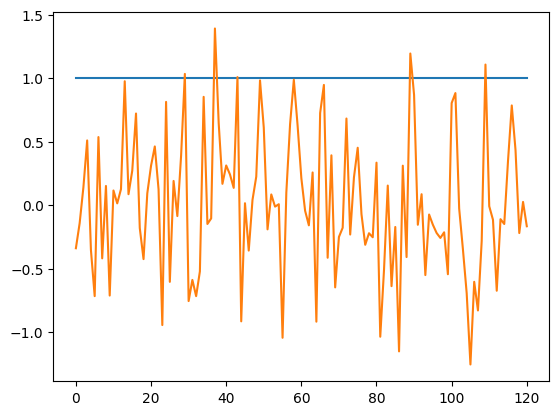

In [46]:
plt.plot(input.flatten())
plt.plot(out.flatten())

In [20]:
from utils import photon_env_dicts

env = photon_env_dicts()[config["ENV_NAME"]](**config["ENV_PARAMS"])

In [21]:
# Extracting Results

metrics = single_result["metrics"]

rewards = metrics["reward"]
max_pFs = metrics["max pF"]
max_photons = metrics["max photon"]
photon_times = metrics["photon time"]
smoothnesses = metrics["smoothness"]
bandwidths = metrics["bandwidth"]
actions = metrics["action"]

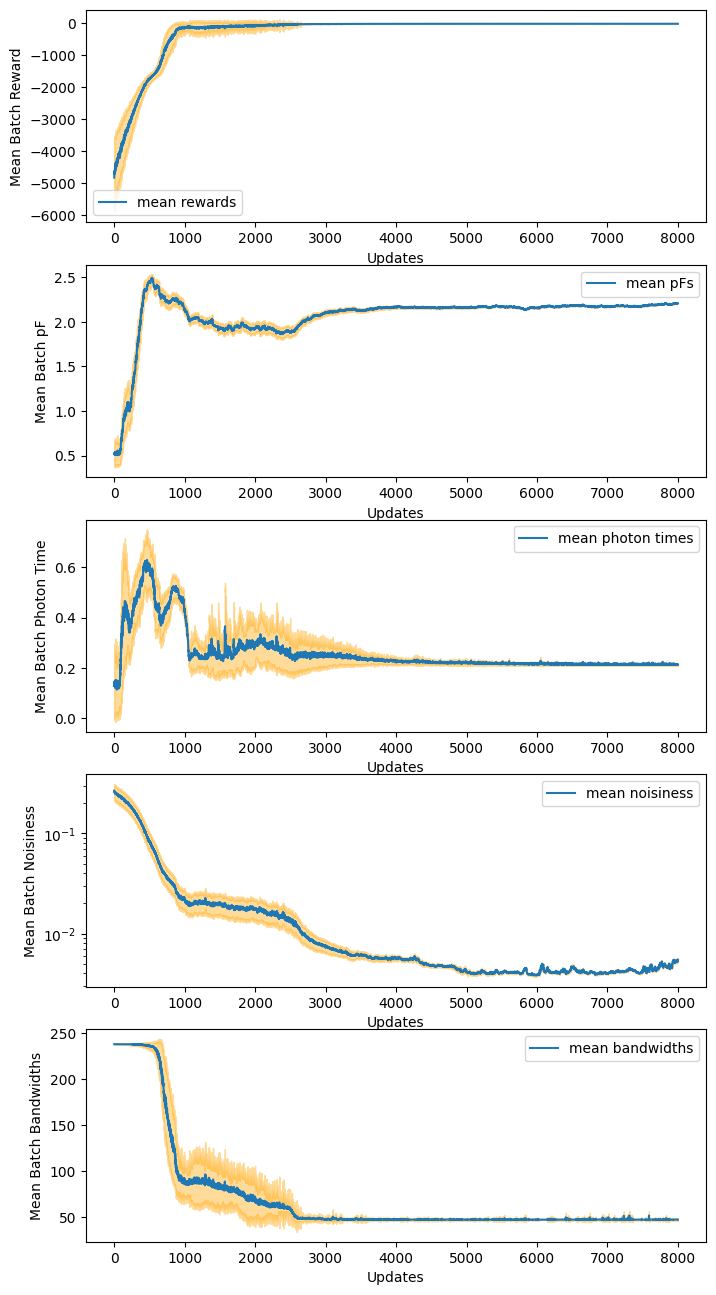

In [22]:
from utils import plot_learning

plot_learning(
    rewards=rewards,
    max_pFs=max_pFs,
    photon_times=photon_times,
    smoothnesses=smoothnesses,
    bandwidths=bandwidths,
)

[0.21336797 0.21041667 0.21041667 0.21111111 0.2120938  0.21014071
 0.21255104 0.21441801 0.21551175 0.21609403 0.21111111 0.21135646
 0.21041667 0.22183021 0.21069624 0.21452949 0.21494519 0.21410196
 0.21041667 0.21436166 0.21111111 0.21213801 0.21111111 0.21111111
 0.21070777 0.2102671  0.20972222 0.21040078 0.21111111 0.21041667
 0.21041667 0.2154704  0.20972222 0.21262968 0.21385328 0.21111111
 0.20972222 0.21543554 0.22050308 0.21441079 0.21257786 0.21041667
 0.21332908 0.21393666 0.2127178  0.2119115  0.21227084 0.21509432
 0.21956654 0.20982855 0.21041667 0.2136246  0.2133637  0.21079166
 0.21273251 0.21554839 0.21111111 0.21111111 0.21414329 0.21749561
 0.20972222 0.21486363 0.21982358 0.21215952 0.21111111 0.21558225
 0.20972222 0.21362935 0.21002521 0.21424117 0.21180556 0.21195736
 0.21279877 0.22013147 0.21111111 0.21066983 0.21425071 0.2145052
 0.21111111 0.21166892 0.21509016 0.2112523  0.2119011  0.21180556
 0.21041667 0.21501071 0.21111111 0.21472085 0.21041667 0.21530

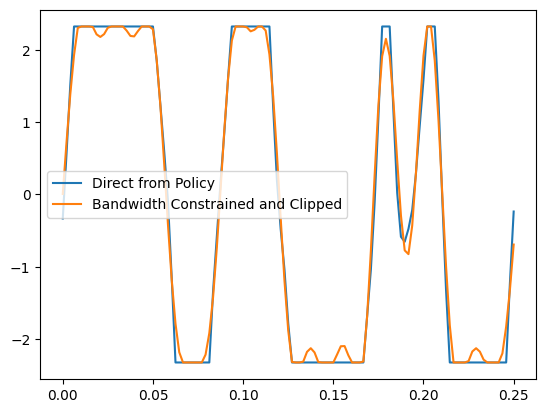

In [23]:
raw_final_action = -jnp.mean(actions, axis=1)[-1]
raw_final_action = -actions[-1, 0]
raw_transformed_action = env.prepare_action(raw_final_action)
env.kernel = env.default_params.gauss_kernel
smooth_final_action = env.drive_smoother(raw_transformed_action)

print(photon_times[-1])

plt.plot(env.ts_action, raw_final_action, label='Direct from Policy')
plt.plot(env.ts_action, raw_transformed_action / env.a0, label='Bandwidth Constrained and Clipped')
# plt.plot(env.ts_action, smooth_final_action, label='Smoothed')
plt.legend()
plt.show()

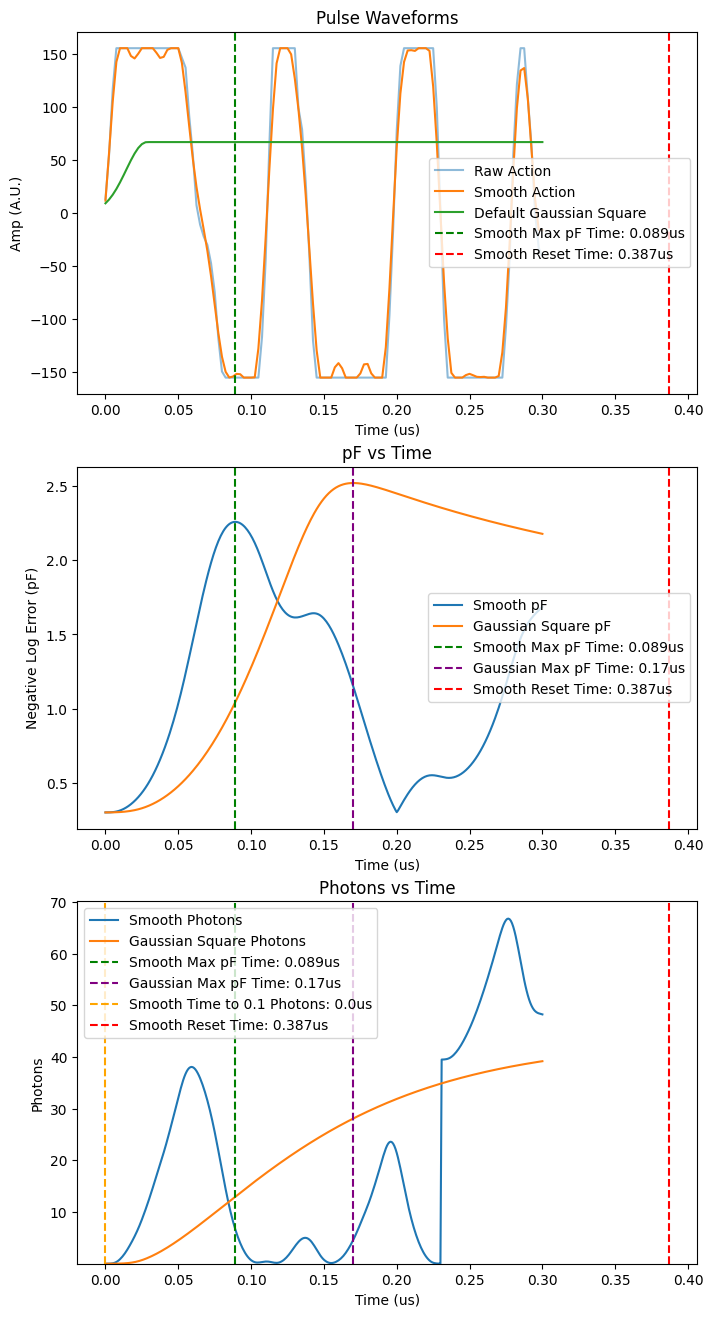

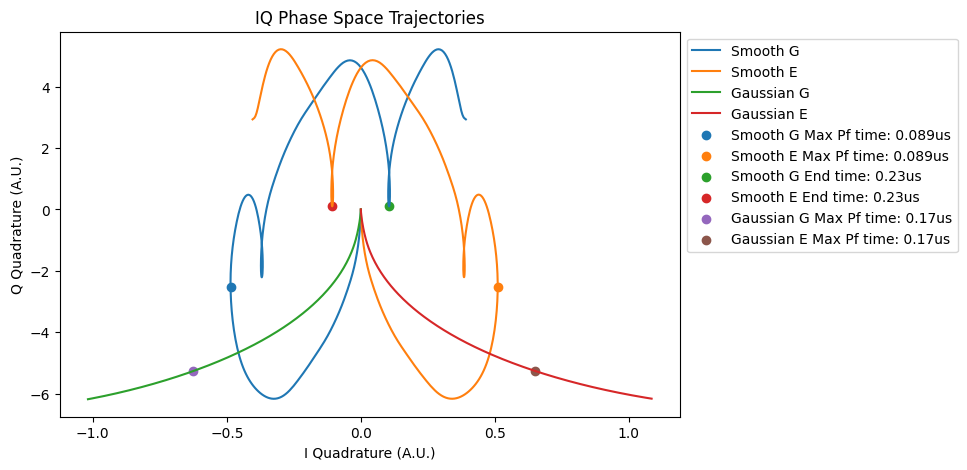

In [14]:
env.rollout_action(raw_final_action)